<a href="https://colab.research.google.com/github/sammy-christine/capstone-project/blob/master/Employee_attrition_and_perfomance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API
!pip install kaggle

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s titanic

ref                                  title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
heptapod/titanic                     Titanic                                             11090  2017-05-16 08:14:22.210000         108618       1572  0.7058824        
brendan45774/test-file               Titanic dataset                                     11514  2021-12-02 16:11:42.367000         169646       1337  1.0              
yasserh/titanic-dataset              Titanic Dataset                                     22564  2021-12-24 14:53:06.913000         133077        436  1.0              
azeembootwala/titanic                Titanic                                             12406  2017-06-05 12:14:37.477000          23529        197  0.8235294 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Prettier plots
sns.set(style="whitegrid")

In [8]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1) (1).csv


In [10]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [11]:
df.shape

df.head()

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df.info()  # Data types, nulls, etc.

df.isnull().sum()  # Missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


problem statement

Employee attrition is a major concern in most organizations. The goal of this project is to:

- Analyze employee-related data to discover patterns linked to attrition.
- Build a machine learning model to predict if an employee is likely to leave the company.
- Recommend strategies to reduce attrition and improve employee retention.

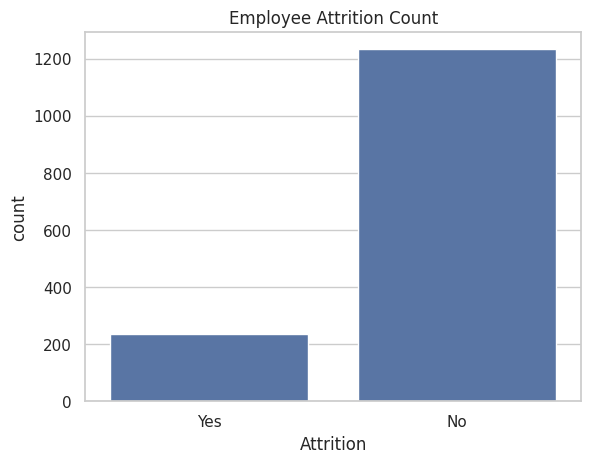

In [21]:
# visualizing data
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')
plt.show()

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

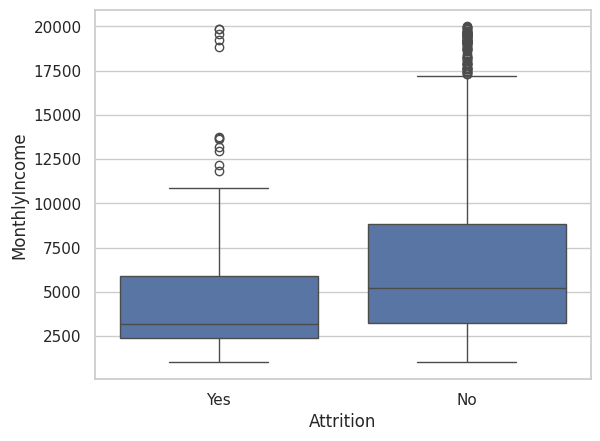

In [22]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

Data cleaning and preprocessing


In [25]:
# Convert categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = Le.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Model building



In [26]:
# Define features and target
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [29]:
# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[253   2]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



Visualizing results



In [30]:
importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Top 10 Important Features for Attrition Prediction')

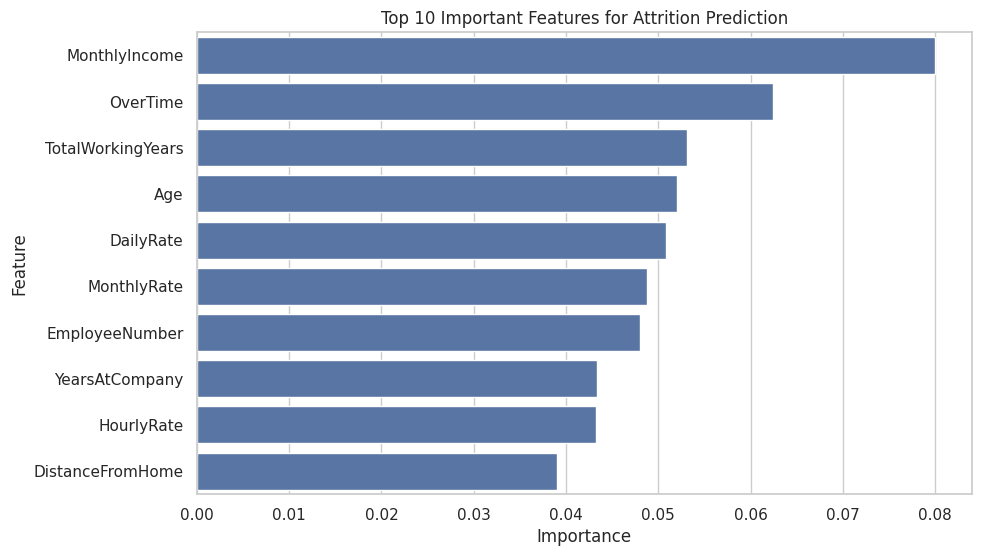

In [31]:
# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Important Features for Attrition Prediction')

Key factors influencing attrition include: OverTime, MonthlyIncome, JobRole, Age, and DistanceFromHome.

The model predicts attrition with decent accuracy using Random Forest.

Recommendations:

Monitor employees with high overtime.

Consider reviewing job satisfaction and compensation strategies.